<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
import csv
import pandas as pd

In [3]:
fname = './sat_scores.csv'

In [4]:
#pulling data into on list to clean
rows = []

with open(fname, 'r') as f:
    raw_data = f.read()
    for row in raw_data:
        rows.append(row)
        

In [5]:
#separating out the individual rows into their own lists
k = []
for line in raw_data.split('\n')[:-1]:
    v = []
    
    for cell in line.split(','):  
        try:
            v.append(int(cell))  #changing numerical strings to integers
        except:
            v.append(cell)            
    k.append(v)  
print(k)    


[['State', 'Rate', 'Verbal', 'Math'], ['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NE', 8, 562, 568], ['OK', 8, 567, 561], ['MO', 8, 577, 577], ['LA', 7, 564, 562], [

In [6]:
#creation of two lists and a dictionary, separating out the components needed
key = k[0]
values = k[1:]
data ={}
print(key)
print(values)
print(data)

['State', 'Rate', 'Verbal', 'Math']
[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NE', 8, 562, 568], ['OK', 8, 567, 561], ['MO', 8, 577, 577], ['LA', 7, 564, 562], ['

In [7]:
#recombining the components into the dictionary format required
for index, column_name in enumerate(key): 
    data[column_name] = []
    for v in values:
        data[column_name].append(v[index])
print(data)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [8]:
data = pd.DataFrame(data)
sat = pd.read_csv(fname)

In [9]:
data.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [10]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [323]:
# The data cannot be as easily loaded into a dictionary dataframe as opposed to pandas.
# Data types are the same for both as the integers were created from strings in the dictionary creation process

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [12]:
sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [13]:
sat.shape

(52, 4)

In [14]:
sat.State.unique()

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], dtype=object)

In [15]:
sat.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [16]:
sat.drop(labels=51,axis=0,inplace=True)

In [17]:
sat.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [331]:
# State: State in which the test was taken, object/string variable
# Rate: The percentage rate at which the test was taken in that state, int64 variable
# Verbal: The average score for the verbal portion of the test within each state, int64 variable
# Math: The average score for the math portion of the test within each state, int64 variable
# Sat shape: 51 rows, 4 columns

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

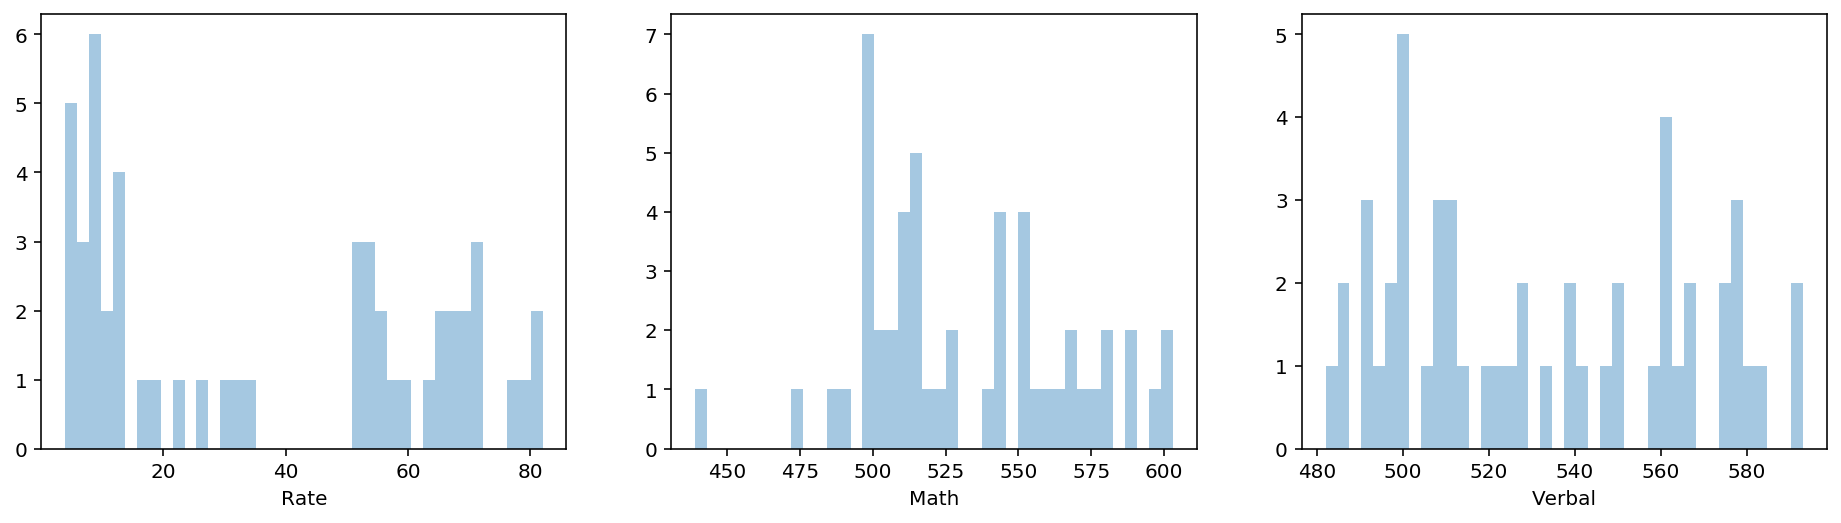

In [19]:
fig, axes = plt.subplots(1,3, figsize=(16,4))
sns.distplot(sat['Rate'], kde=False, bins= 40, ax=axes[0])
sns.distplot(sat['Math'], kde=False, bins= 40, ax=axes[1])
sns.distplot(sat['Verbal'], kde=False, bins= 40, ax=axes[2])


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

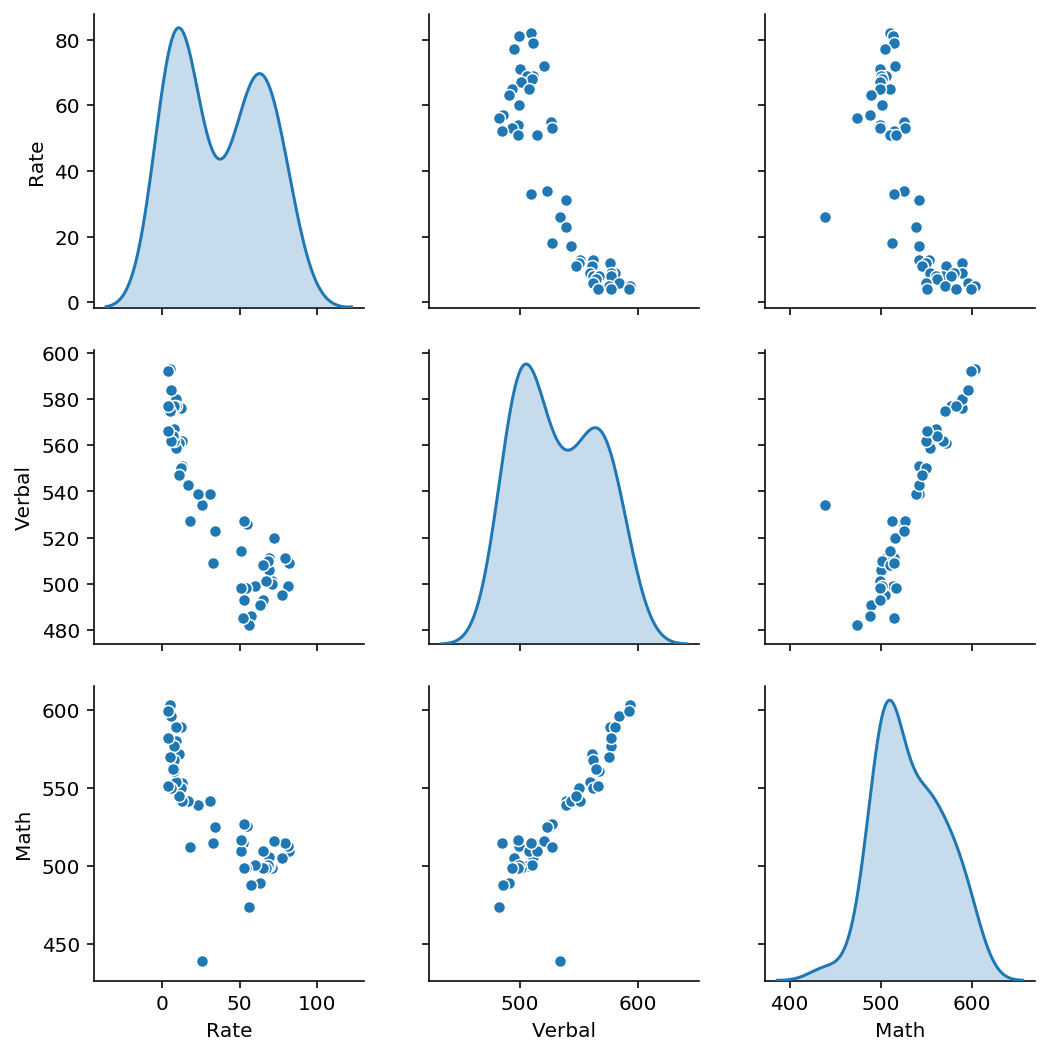

In [20]:
sns.pairplot(sat,diag_kind='kde')

 * The Verbal and Math scores have a strong positive linear relationship. 
 * The rate taken has a negative linear relationship with both verbal and 
 math scores but it is not as strong. Most likely this is because the people
 that are taking the SATs in the states with a low rate are doing so because 
 they want to apply to colleges in the states that use SAT as part of the application process

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

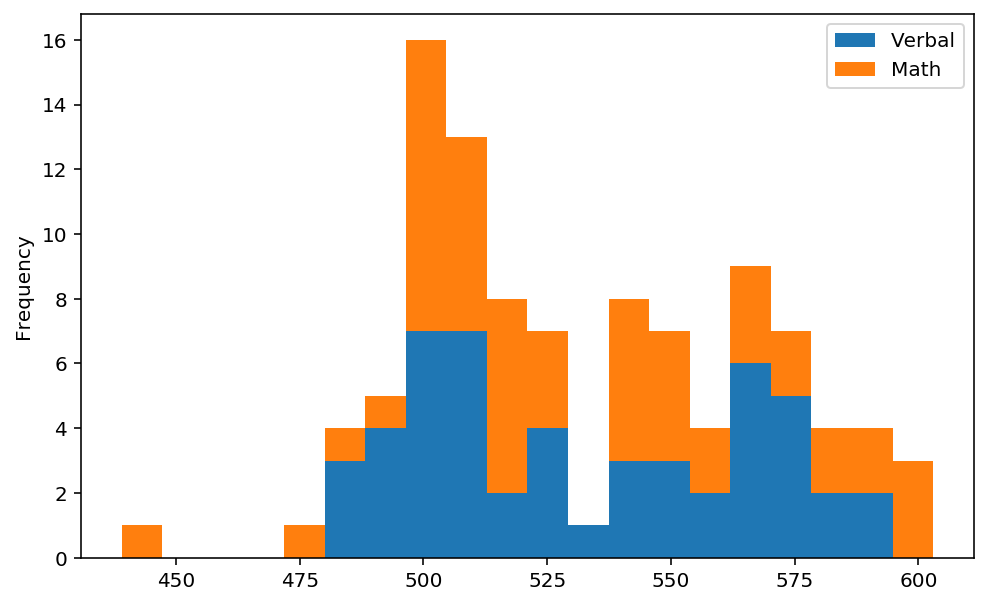

In [21]:
sat[['Verbal','Math']].plot(kind='hist', stacked=True, figsize=(8,5), bins=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

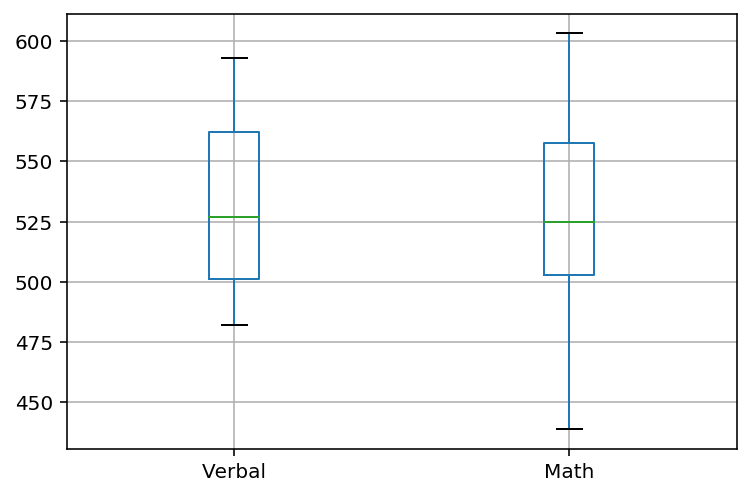

In [22]:
sat[['Verbal','Math']].boxplot(rot=0)

* With a box plot you can easily compare the values of the descriptive statistics visually. Namely, the means, IQRs and spreads.
* Rate cannot be plotted together with these two variables as it is not on the same scale as them so they should not be compared.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [23]:
verbal_mean = np.mean(sat['Verbal'])
verbal_std = np.std(sat['Verbal'])
math_mean = np.mean(sat['Math'])
math_std = np.std(sat['Math'])
rate_mean = np.mean(sat['Rate'])
rate_std = np.std(sat['Rate'])

In [24]:
sat['rate_std'] = (sat['Rate'] - rate_mean)/rate_std
sat['verbal_std'] = (sat['Verbal'] - verbal_mean)/verbal_std
sat['math_std'] = (sat['Math'] - math_mean)/math_std

In [25]:
sat.head()

,State,Rate,Verbal,Math,rate_std,verbal_std,math_std
0,CT,82,509,510,1.649606,-0.712322,-0.607938
1,NJ,81,499,513,1.612948,-1.015059,-0.524442
2,MA,79,511,515,1.539632,-0.651775,-0.468778
3,NY,77,495,505,1.466317,-1.136154,-0.747098
4,NH,72,520,516,1.283027,-0.379312,-0.440946


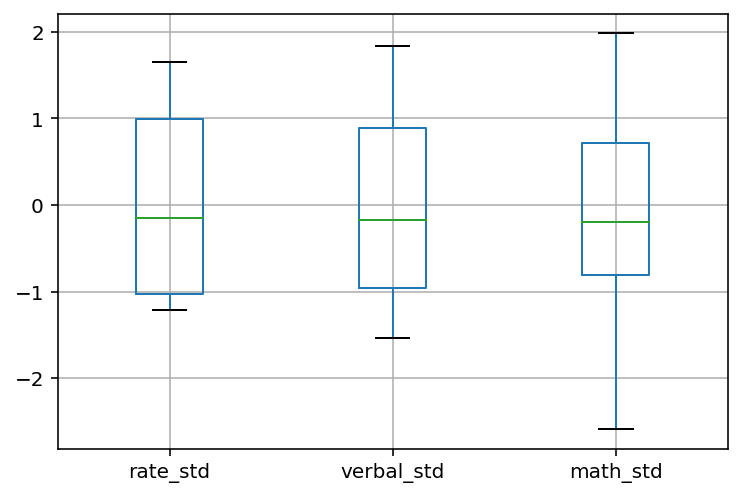

In [26]:
sat[['rate_std','verbal_std','math_std']].boxplot(rot=0)

* A standardised column has been created for each of these values in order to be able to plot on the same scale. This box plot shows a similarity between the distributions of the rate and verbal variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [27]:
print("States above mean in Verbal: ", sat['State'][sat['Verbal'] > verbal_mean])
print("Number of states above mean in Verbal: ", sat[sat['Verbal'] > verbal_mean].shape[0])

States above mean in Verbal:  26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
Number of states above mean in Verbal:  24


* As the number of states with score over the mean is just under half the total number of states, we can conclude that the distribution of verbal scores is roughly normal with a slight positive skew.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [28]:
verbal_median = np.median(sat['Verbal'])

In [29]:
print("States above median in Verbal: ", sat['State'][sat['Verbal'] > verbal_median])
print("Number of states above median in Verbal: ", sat[sat['Verbal'] > verbal_median].shape[0])

States above median in Verbal:  26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object
Number of states above median in Verbal:  24


The list is exactly the same. Further investigation needed to discover why:

In [30]:
print("States equal to median in Verbal: ", sat['State'][sat['Verbal'] == verbal_median])

States equal to median in Verbal:  19    WA
29    WV
Name: State, dtype: object


* There are two states with the median value, which explains why there are only 24 states above the median as opposed to 25. The fact that both the mean and median have 24 states above average confirms the theory that the distribution of the verbal scores is roughly normal.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [31]:
sat['subject_variance'] = sat['Verbal'] - sat['Math']

In [32]:
sat.head()

,State,Rate,Verbal,Math,rate_std,verbal_std,math_std,subject_variance
0,CT,82,509,510,1.649606,-0.712322,-0.607938,-1
1,NJ,81,499,513,1.612948,-1.015059,-0.524442,-14
2,MA,79,511,515,1.539632,-0.651775,-0.468778,-4
3,NY,77,495,505,1.466317,-1.136154,-0.747098,-10
4,NH,72,520,516,1.283027,-0.379312,-0.440946,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [33]:
verbal_greater = sat.sort_values('subject_variance',ascending=False).iloc[:10,:5]
verbal_greater.head(3)

,State,Rate,Verbal,Math,rate_std
27,OH,26,534,439,-0.403237
50,MS,4,566,551,-1.209711
29,WV,18,527,512,-0.696500


In [34]:
math_greater = sat.sort_values('subject_variance').iloc[:10,:5]
math_greater.head(3)

,State,Rate,Verbal,Math,rate_std
21,HI,52,485,515,0.549869
23,CA,51,498,517,0.513211
1,NJ,81,499,513,1.612948


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


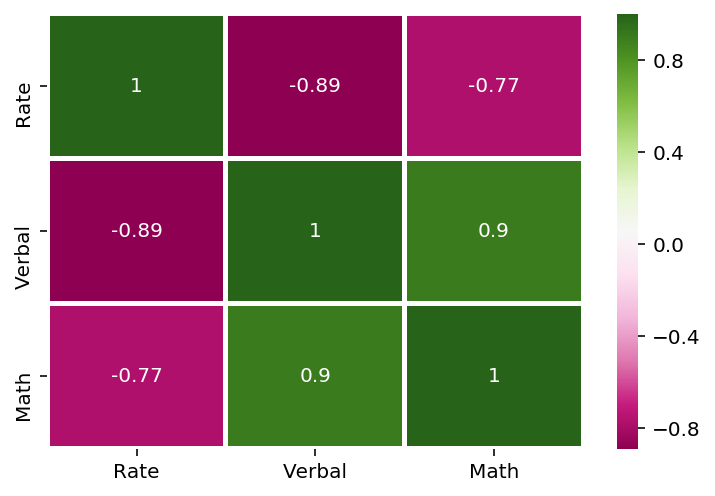

In [35]:
sns.heatmap(sat.iloc[:,:4].corr(), cmap='PiYG', annot=True, linewidths=2) 

* As seen in the pairplot, the correlation matrix confirms that verbal and math have a strong linear relationship. This also confirms the strong negative linear relationship between verbal and rate. 
* With the lowest correlation in this matrix being 0.77, it is clear that all variables are highly correlated.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [36]:
sat.iloc[:,:4].describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


- Count: shows there are a total of 51 states (including Washington DC)
- Mean: on average, only 37% of students are taking the SATs per state. The average score for verbal and math are very similar
- STD: There is a much larger variation in scores for the math portion of the exam than the verbal
- Min: The lowest math score is significantly lower than the verbal
- 25%: By the 25th percentile the math and verbal scores have evened out. 25% of the states have a rate of less than 9. 
- 50%: The verbal and math median scores are similar
- 75%: The verbal score is slightly higher than the math. 
- Max: The highest math score is significantly higher than the verbal


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

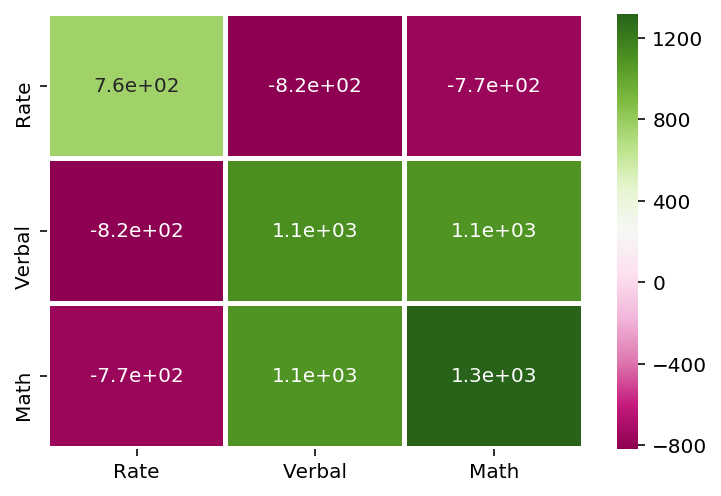

In [37]:
sns.heatmap(sat.iloc[:,:4].cov(), cmap='PiYG', annot=True, linewidths=2) 

- Correlation is calculated by taking the covariance and diving by the product of the two varialbes' standard deviations.
- Correlation matrix is preferred over the covariance matrix because it is scaled to adjust for differences in units. Also, as the scale is between -1 and 1, the numerical values can be used to tell which variables are highly correlated and which aren't

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [38]:
drug = pd.read_csv('./drug-use-by-age.csv')

In [39]:
drug.shape

(17, 28)

In [40]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [41]:
drug.tail()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [42]:
drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [43]:
drug.dtypes
# a few variables are of dtype object because of the presence of - for some of the null values

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [44]:
#removal of -'s so that the columns can be converted to numerical values
drug.replace(to_replace='-', value=0, inplace=True)

In [45]:
change = ['cocaine-frequency','crack-frequency','heroin-frequency',
              'inhalant-frequency','oxycontin-frequency','meth-frequency']
for d in change:
    drug[d] = pd.to_numeric(drug[d])

In [46]:
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [47]:
drug.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
cocaine-frequency,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
crack-frequency,17.0,12.382353,17.361532,0.0,2.0,6.0,15.0,62.0
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1


In [48]:
import re

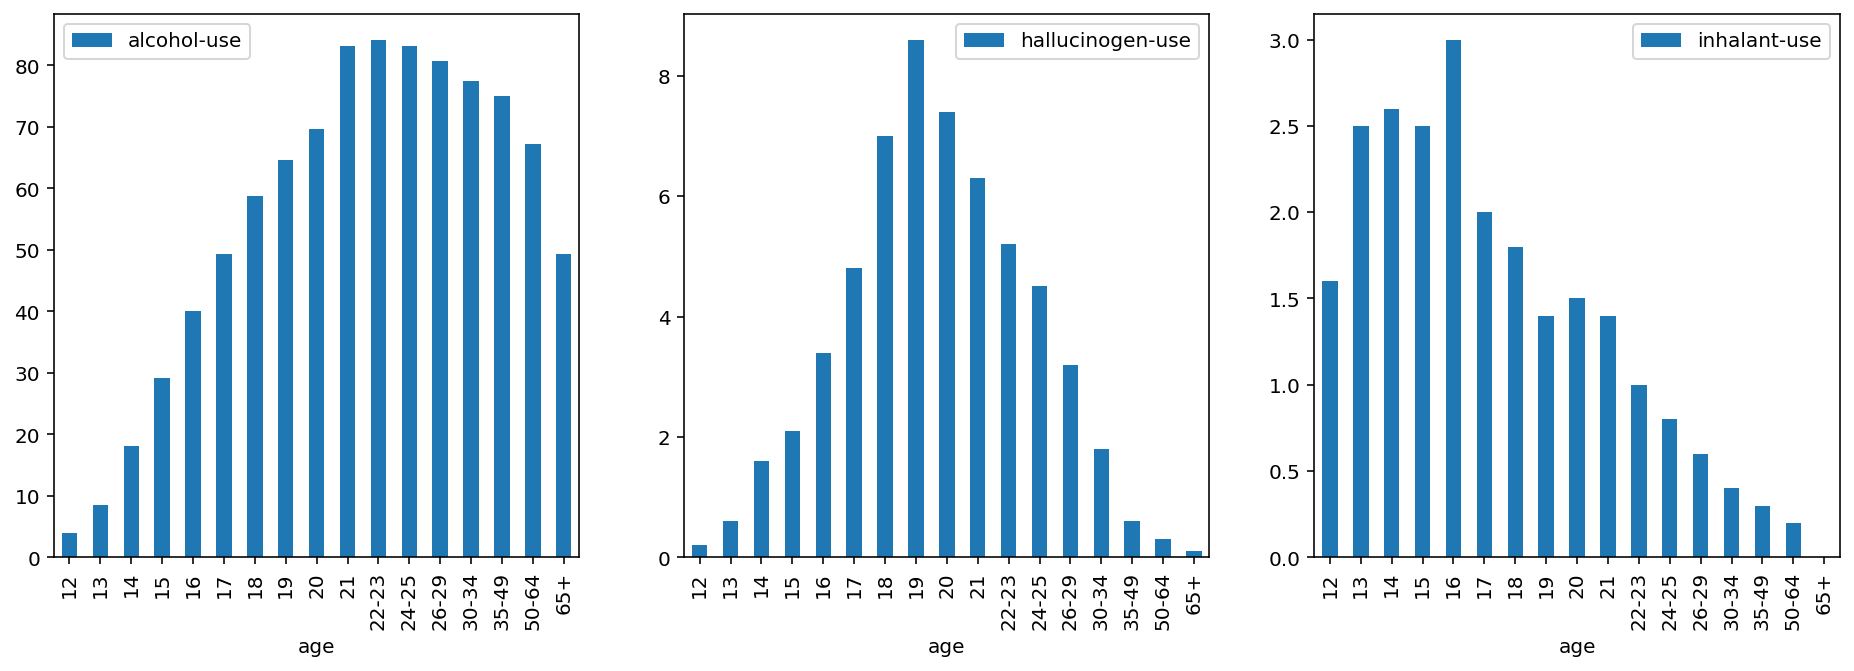

In [49]:
#looking at varying distribution in use
fig, axes = plt.subplots(1,3, figsize=(16,5))
drug.plot(kind='bar',x='age',y='alcohol-use',ax=axes[0])
drug.plot(kind='bar',x='age',y='hallucinogen-use',ax=axes[1])
drug.plot(kind='bar',x='age',y='inhalant-use',ax=axes[2])


In [50]:
#creation of dataframe consisting of only use variables
drug_use = drug.filter(regex='-use$')

In [51]:
#adding age back in
drug_use = pd.concat([drug.iloc[:,0:1],drug_use], axis=1)

In [52]:
drug_use.head()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


In [53]:
drug_use.mean().sort_values()

sedative-use          0.282353
crack-use             0.294118
heroin-use            0.352941
meth-use              0.382353
oxycontin-use         0.935294
inhalant-use          1.388235
stimulant-use         1.917647
cocaine-use           2.176471
tranquilizer-use      2.805882
hallucinogen-use      3.394118
pain-releiver-use     6.270588
marijuana-use        18.923529
alcohol-use          55.429412
dtype: float64

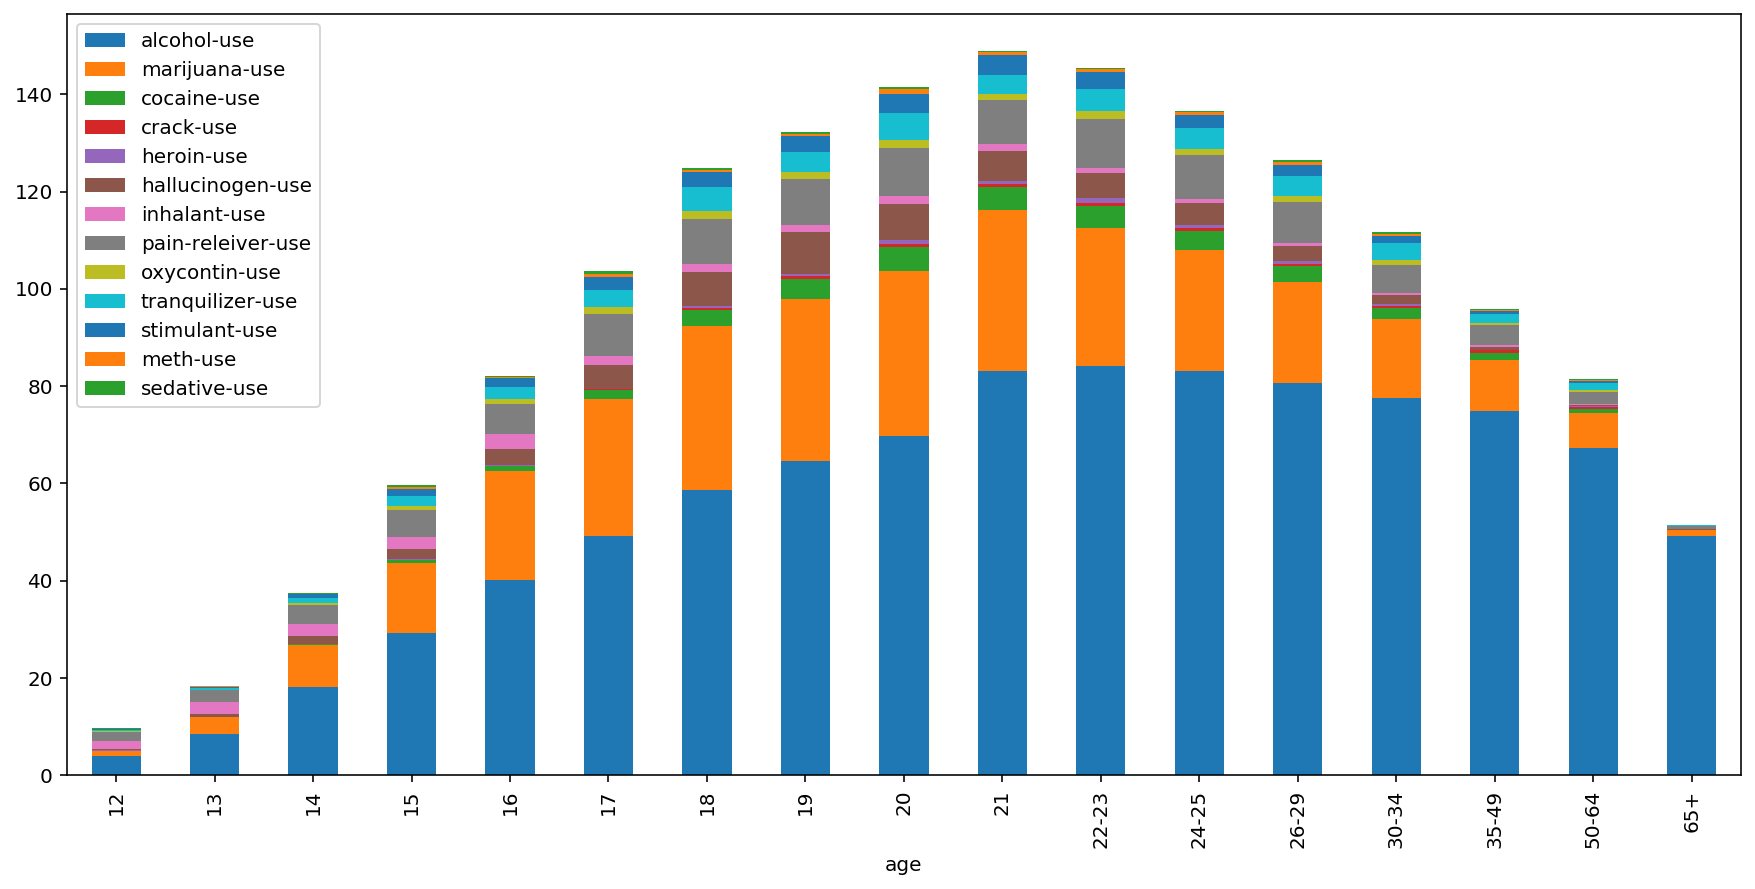

In [54]:
drug_use.set_index('age',drop=True, inplace=True)
drug_use.plot(kind='bar', stacked=True, figsize=(15,7))

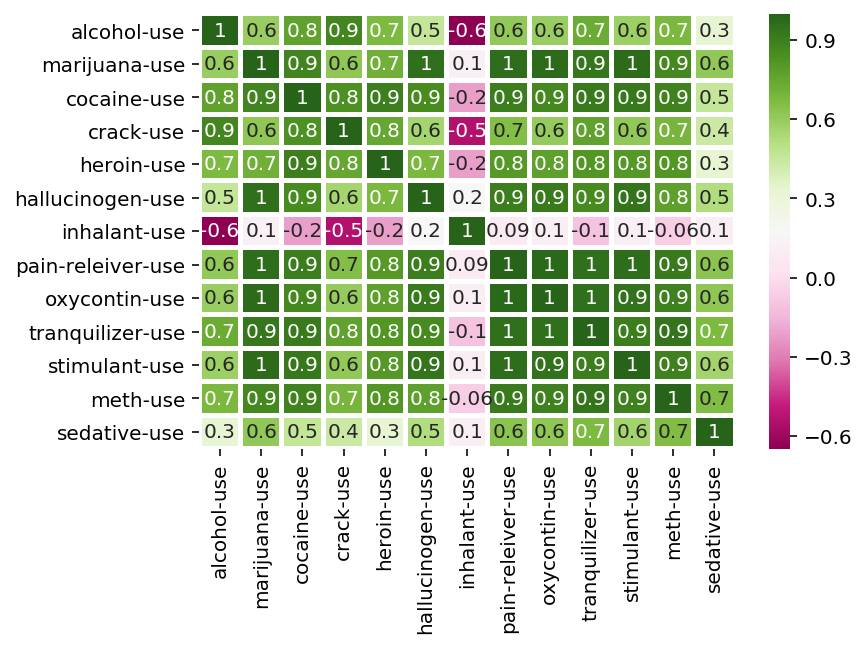

In [55]:
sns.heatmap(drug_use.corr(), cmap='PiYG', annot=True, linewidths=2,fmt='0.1g')

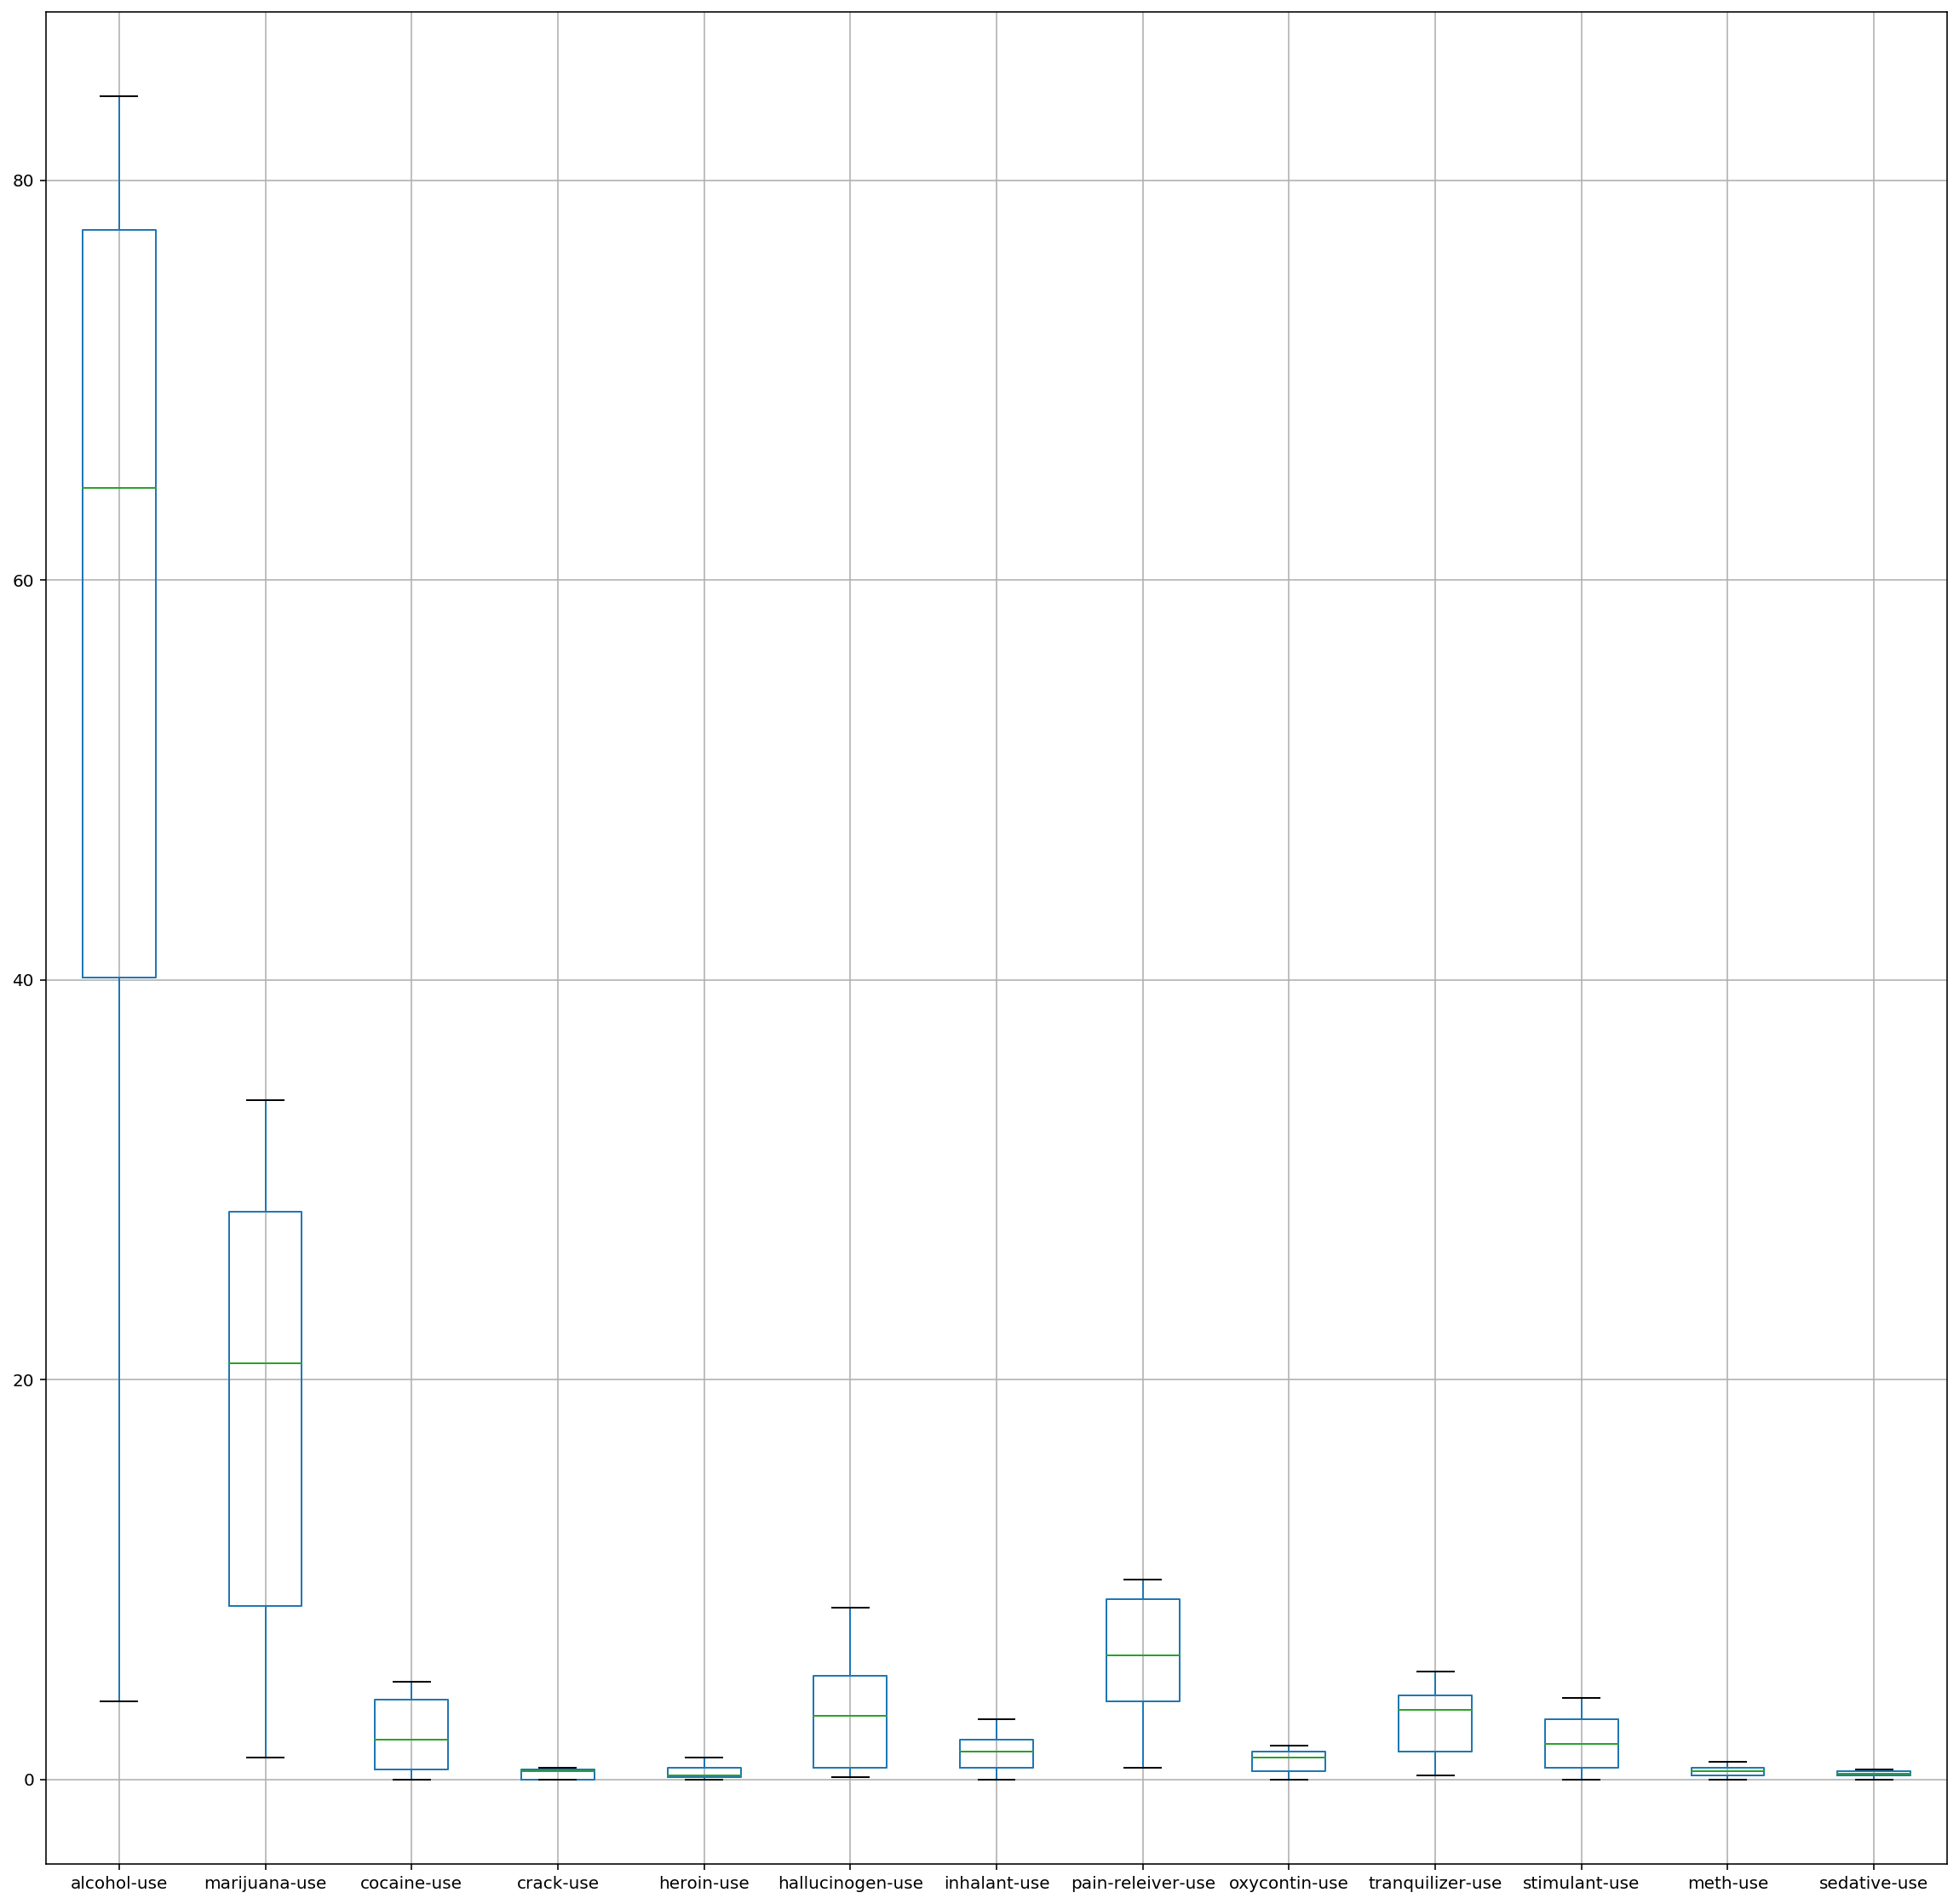

In [56]:
drug_use.boxplot(figsize=(20,20))

In [57]:
#creation of dataframe consisting of only frequency variables
drug_freq = drug.filter(regex='(-frequency)$')

In [58]:
#change of column names for ease of plotting
drug_freq.columns = drug_freq.columns.str.replace('uency','')

In [59]:
drug_freq.head()

,alcohol-freq,marijuana-freq,cocaine-freq,crack-freq,heroin-freq,hallucinogen-freq,inhalant-freq,pain-releiver-freq,oxycontin-freq,tranquilizer-freq,stimulant-freq,meth-freq,sedative-freq
0,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


In [60]:
drug_freq.mean().sort_values()

inhalant-freq          5.794118
cocaine-freq           7.411765
hallucinogen-freq      8.411765
tranquilizer-freq     11.735294
crack-freq            12.382353
oxycontin-freq        13.941176
pain-releiver-freq    14.705882
sedative-freq         19.382353
stimulant-freq        31.147059
meth-freq             31.735294
alcohol-freq          33.352941
marijuana-freq        42.941176
heroin-freq           68.970588
dtype: float64

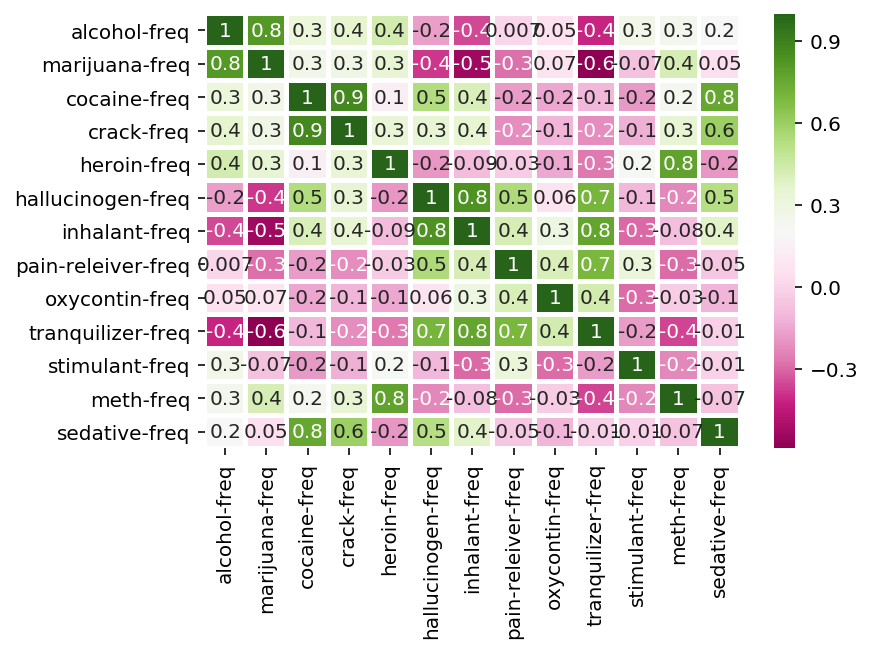

In [61]:
sns.heatmap(drug_freq.corr(), cmap='PiYG', annot=True, linewidths=2,fmt='0.1g')

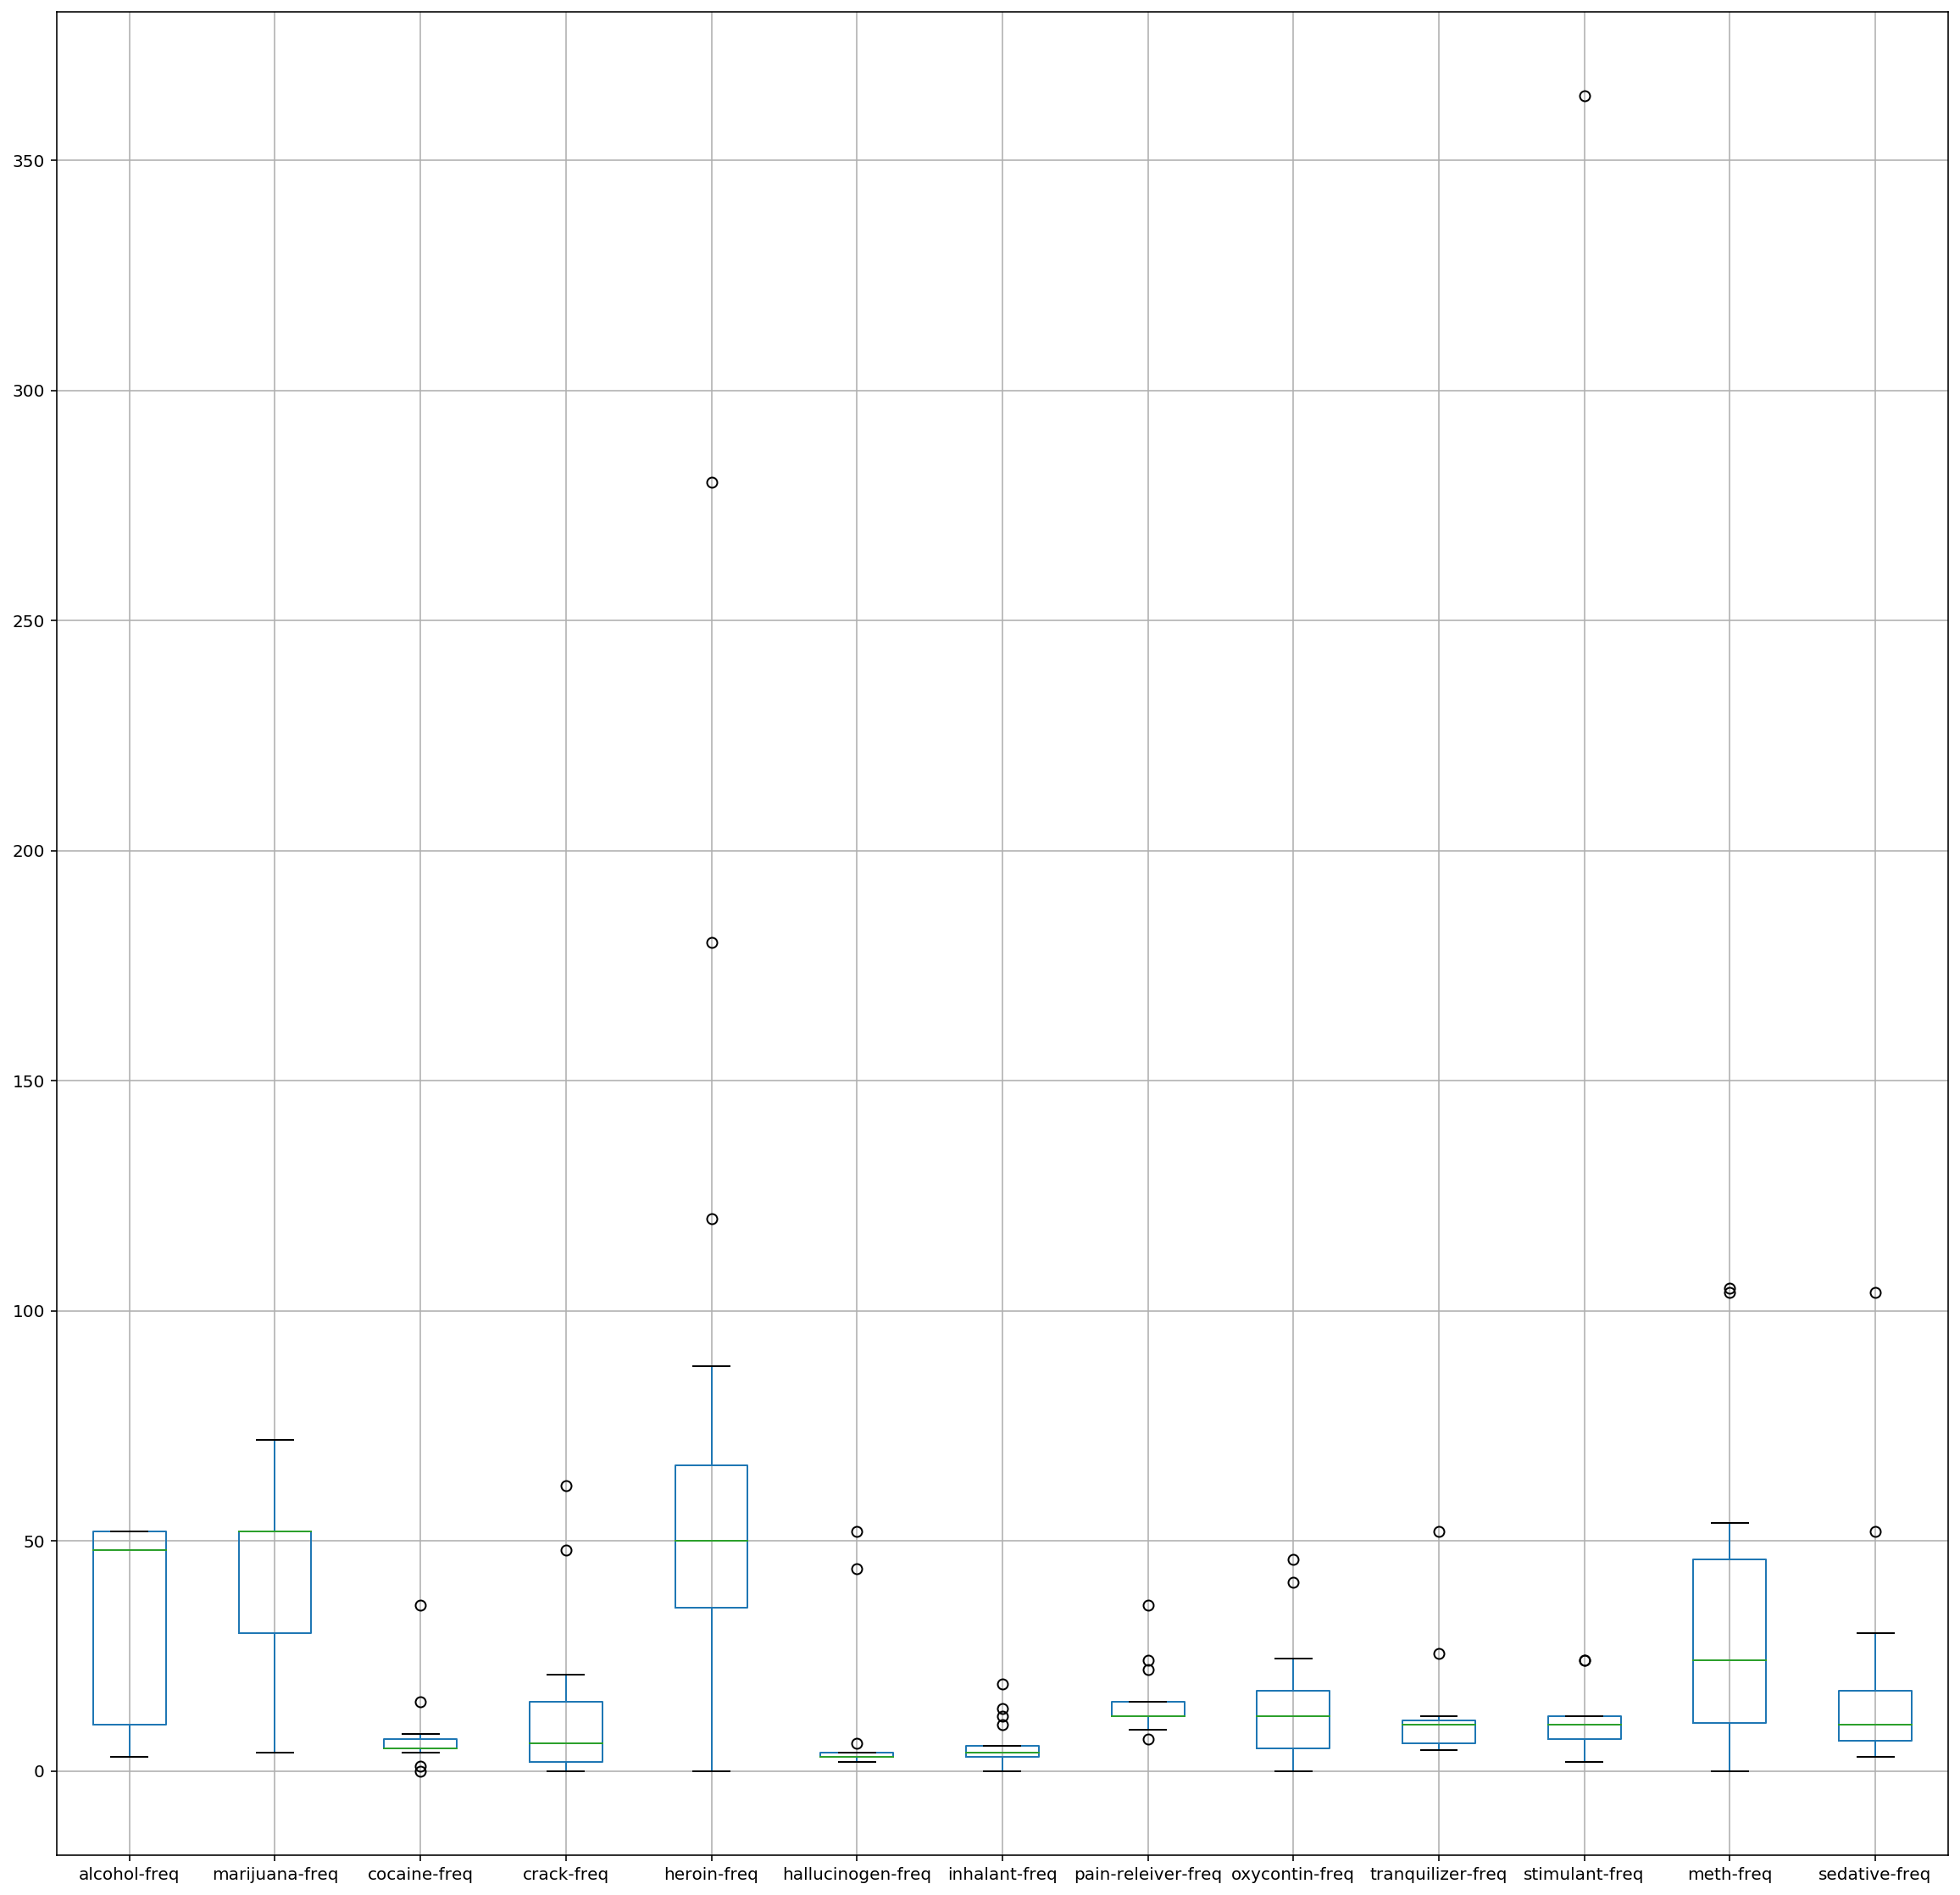

In [62]:
drug_freq.boxplot(figsize=(20,20))

* The dataset has a wide variety of drug categories used to describe percentage of people using and frequency of use across age groups. 

* There are many different ways to consider this data as some of the drug types are varied as far as legality and what they are used for. For example, you cannot compare alochol, hallucinogens and inhalants as one is legal for only a certain age group, one is illegal and the other has no restrictions and is widely used for youth illness.

* The age groups with the highest reported drug use across a combination of all drugs are those between 18 and 29.

* There are many drugs which are highly correlated across use, especially when you consider the drugs that are legal or legal but sold under an illegal trade for recreational use. Inhalant sticks out as the differing category with very low correlations or high negative correlations in some cases.

* The drugs most used overall are alcohol, marijuana, pain-relievers, tranquilizers and hallucinogens

* The most frequently used drugs are heroin, marijuana, alcohol, meth and stimulants. This is not surprising considering these are the drugs we know to be addictive.


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**
1.
 * is there a relationship between class A drug use across ages?
 * what is the relationship between cocaine use and the use of the other class a drugs? (implication being that users of one would probably be using both)

2. 
* whether or not the relationships are linear
* the value of the correlation between these
* the confidence interval for these correlations
...

In [63]:
#creation of a subset
class_a = drug.filter(regex='^crack|cocaine|heroin|meth')
class_a = pd.concat([drug.iloc[:,0:2],class_a], axis=1)

In [64]:
class_a

,age,n,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,meth-use,meth-frequency
0,12,2798,0.1,5.0,0.0,0.0,0.1,35.5,0.0,0.0
1,13,2757,0.1,1.0,0.0,3.0,0.0,0.0,0.1,5.0
2,14,2792,0.1,5.5,0.0,0.0,0.1,2.0,0.1,24.0
3,15,2956,0.5,4.0,0.1,9.5,0.2,1.0,0.3,10.5
4,16,3058,1.0,7.0,0.0,1.0,0.1,66.5,0.3,36.0
5,17,3038,2.0,5.0,0.1,21.0,0.1,64.0,0.6,48.0
6,18,2469,3.2,5.0,0.4,10.0,0.4,46.0,0.5,12.0
7,19,2223,4.1,5.5,0.5,2.0,0.5,180.0,0.4,105.0
8,20,2271,4.9,8.0,0.6,5.0,0.9,45.0,0.9,12.0
9,21,2354,4.8,5.0,0.5,17.0,0.6,30.0,0.6,2.0


In [65]:
#removing age group 65+ as all values are zero

class_a.drop(index=16)

,age,n,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,meth-use,meth-frequency
0,12,2798,0.1,5.0,0.0,0.0,0.1,35.5,0.0,0.0
1,13,2757,0.1,1.0,0.0,3.0,0.0,0.0,0.1,5.0
2,14,2792,0.1,5.5,0.0,0.0,0.1,2.0,0.1,24.0
3,15,2956,0.5,4.0,0.1,9.5,0.2,1.0,0.3,10.5
4,16,3058,1.0,7.0,0.0,1.0,0.1,66.5,0.3,36.0
5,17,3038,2.0,5.0,0.1,21.0,0.1,64.0,0.6,48.0
6,18,2469,3.2,5.0,0.4,10.0,0.4,46.0,0.5,12.0
7,19,2223,4.1,5.5,0.5,2.0,0.5,180.0,0.4,105.0
8,20,2271,4.9,8.0,0.6,5.0,0.9,45.0,0.9,12.0
9,21,2354,4.8,5.0,0.5,17.0,0.6,30.0,0.6,2.0


In [66]:
class_a.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
cocaine-frequency,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
crack-frequency,17.0,12.382353,17.361532,0.0,2.0,6.0,15.0,62.0
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
heroin-frequency,17.0,68.970588,70.153285,0.0,35.5,50.0,66.5,280.0
meth-use,17.0,0.382353,0.262762,0.0,0.2,0.4,0.6,0.9
meth-frequency,17.0,31.735294,32.206423,0.0,10.5,24.0,46.0,105.0


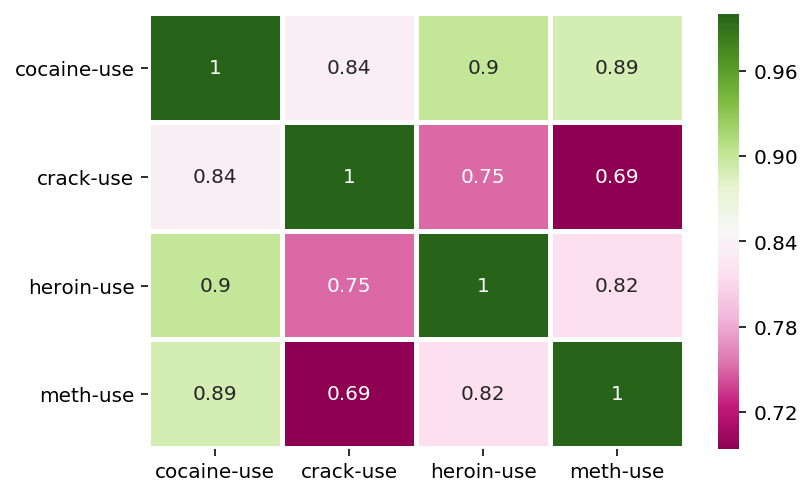

In [67]:
sns.heatmap(class_a[['cocaine-use','crack-use','heroin-use','meth-use']].corr(), cmap='PiYG', annot=True, linewidths=2,fmt='0.2g')

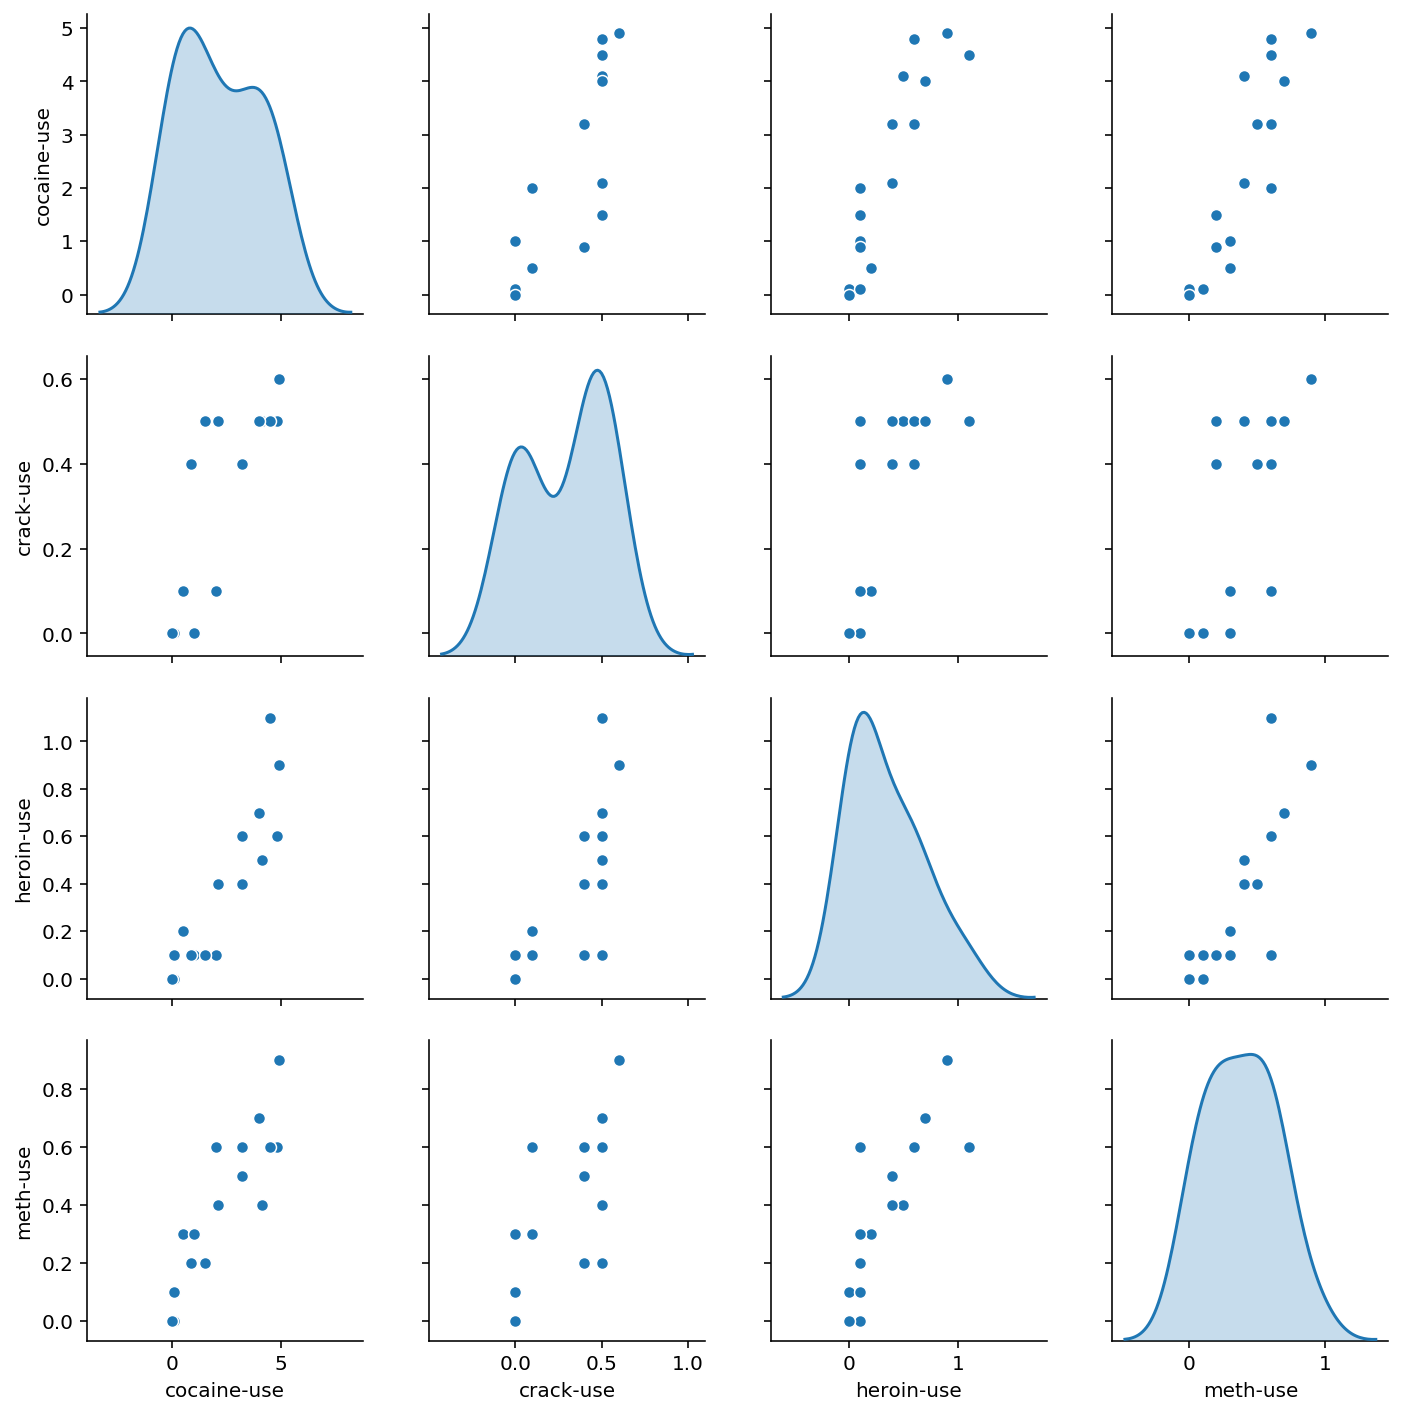

In [68]:
sns.pairplot(class_a[['cocaine-use','crack-use','heroin-use','meth-use']],diag_kind = 'kde')

In [486]:
# goodness of fit test compared to cocaine
# null hypothesis = there is no relationship between cocaine use and meth use
# alternative hypothesis = there is a relationship between cocaine use and meth use
# degrees of freedom = 15 so critical values are:
# alpha = .01 , 30.578
# alpha = .05 , 24.996

In [71]:
#creation of a function to calculate chi squared value
def chi(obs,exp,data=class_a):
    #creation of a column of the chi_squared values for each row
    data['chi_value'] = ((data[obs]-data[exp])**2)/data[exp] 
    chi_sq = 0
    # adding together, the values of the column, skipping over any null values
    for n in data['chi_value']:
        if pd.isnull(n) == True:
            pass
        else:
            chi_sq += n

    return chi_sq

In [72]:
chi('meth-use','cocaine-use')

25.46975709999447

In [ ]:
#so, we can accept the alternative hypothesis with a confidence of 95% 
# but we cannot accept it with a confidence of 99%

In [ ]:
# alternative hypothesis = there is a relationship between cocaine use and crack use

In [73]:
chi('crack-use','cocaine-use')

27.893075949892154

In [ ]:
#so, we can accept the alternative hypothesis with a confidence of 95% 

In [524]:
# alternative hypothesis = there is a relationship between cocaine use and heroin use

In [74]:
chi('heroin-use','cocaine-use')

26.24413887506222

In [ ]:
#so, we can accept the alternative hypothesis with a confidence of 95% 

In [ ]:
# alternative hypothesis = there is a relationship between crack use and meth use

**Report**


With the lowest correlation between all four class A drugs being 0.69, it is clear that there is quite a strong relationship among them all.


Relationship to cocaine:
* Crack - This is the drug with the lowest correlation to cocaine of 0.84, this can also be seen in the pairplot when comparing the 3 scatterplots of cocaine use. The chi-test for the relationship between cocaine use and crack use showed their to be a chi value of 27.89 meaning we can accept the hypothesis that the two are related with a confidence of atleast 95% 
* Meth - Correlation to cocaine of 0.84. The chi-test for the relationship between cocaine use and meth use showed their to be a chi value of 25.47 meaning we can accept the hypothesis that the two are related with a confidence of atleast 95% 
* Heroin - This is the drug with the highest correlation to cocaine of 0.9. The chi-test for the relationship between cocaine use and heroin use showed their to be a chi value of 26.24 meaning we can accept the hypothesis that the two are related with a confidence of atleast 95% 



...